# Closest pairs

In this noteobok, we are going to test the different strategies for the problem of finding the closest pairs of points in a graph.

- The **brute force** approach: eveluation of all the pairs
- The **divide to conquer** aprroch: with a split of the graph on the x-axis

## Input paris of points

In [95]:
import random
import matplotlib.pyplot as plt


class InputList(list):
    def __init__(self, l_length: int = 100, min_value: int = 0, max_value: int = 10000, distinct_elements: bool = True):
        """
        Object of input list for algorithms
        Parameters
        ----------
        l_length (int): Length of the input list
        min_value (int): Minimal value of the elements of the list
        max_value (int): Maximal value of the elements of the list
        distinct_elements (bool): distinct elements in the list
        """
        self.l_length = l_length
        self.min_value = min_value
        self.max_value = max_value
        self.distinct_elements = distinct_elements
        self._construct()

    def _find_element_not_in_set(self, already_used: set) -> int:
        """
        This function returns an element not present in a set
        Parameters
        ----------
        already_used (set): a set of int

        Returns
        -------
        int: int not in set
        """
        new_element = random.randint(a=self.min_value, b=self.max_value)
        while new_element in already_used:
            new_element = random.randint(a=self.min_value, b=self.max_value)
        return new_element

    def _construct(self):
        """
        This function will build the object by append elements to the initial empty list
        Returns
        -------
        """
        if self.distinct_elements:
            assert self.l_length <= self.max_value - self.min_value + 1, "The range of values chosen " \
                                                                         "doesn't allow to have distinct values"
            already_used = set()
            for index in range(self.l_length):
                # Find an element not present in already_used
                new_element = self._find_element_not_in_set(already_used)
                # Add the element to already used
                already_used.add(new_element)
                # Add the element to the list
                self.append(new_element)
        else:
            for index in range(self.l_length):
                self.append(random.randint(a=self.min_value, b=self.max_value))


class InputListPairs(list):
    def __init__(self, l_length: int = 100, min_value: int = 0, max_value: int = 10000, distinct_elements: bool = True):
        """
        Object of list of pairs of points of the graph
        Parameters
        ----------
        l_length (int): Number of pairs (points of the graph
        min_value (int): Minimum value of the x and y axes
        max_value (int): Maximum value of the x and y axes
        distinct_elements (bool): whether the points have distinct values of both x and y
        """
        self.l_length = l_length
        self.min_value = min_value
        self.max_value = max_value
        self.distinct_elements = distinct_elements
        self._construct()

    def _construct(self):
        """
        This function will build the object by append elements to the initial empty list
        Returns
        -------
        fig_
        """
        x_values = InputList(l_length=self.l_length,
                             min_value=self.min_value,
                             max_value=self.max_value,
                             distinct_elements=self.distinct_elements)
        y_values = InputList(l_length=self.l_length,
                             min_value=self.min_value,
                             max_value=self.max_value,
                             distinct_elements=self.distinct_elements)

        for x, y in zip(x_values, y_values):
            self.append((x, y))

    def plot(self):
        """
        Function to plot the points on a graph
        Returns
        -------
        fig, ax
        """
        fig, ax = plt.subplots()
        fig.set_size_inches(18.5, 10.5)

        ax.scatter(*zip(*self))
        for i, pair  in enumerate(self):
            ax.annotate(i, (pair[0], pair[1]),fontsize=15)
        plt.show()
        return fig, ax 
        
    def plot_line_between(self, i, j):
        """
        Function that plot a line betwwen to pairs of points of interest
        Parameters
        ----------
        i(int): pair numbered i of the list
        j(int): pair numbered j of the list
        
        Returns
        -------
        

        """
        fig, ax = self.plot()
        ax.plot(self[i], self[j])
        plt.show()
        
        
        

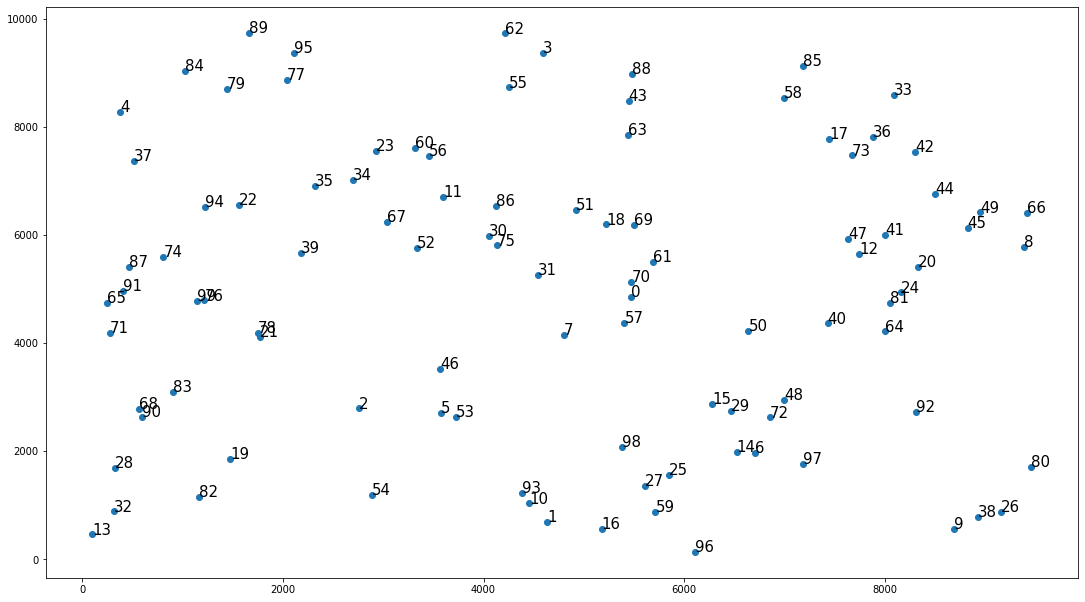

(<Figure size 1332x756 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117c40650>)

In [96]:
ex_pairs = InputListPairs()
ex_pairs.plot()

## Brute force

In [97]:
ex_pairs

[(5475, 4860),
 (4635, 700),
 (2761, 2792),
 (4590, 9368),
 (373, 8269),
 (3575, 2711),
 (6703, 1967),
 (4798, 4157),
 (9386, 5784),
 (8693, 559),
 (4455, 1036),
 (3597, 6699),
 (7745, 5643),
 (100, 463),
 (6526, 1989),
 (6280, 2882),
 (5179, 558),
 (7448, 7769),
 (5222, 6193),
 (1476, 1862),
 (8331, 5402),
 (1767, 4114),
 (1557, 6552),
 (2928, 7553),
 (8166, 4937),
 (5846, 1556),
 (9161, 875),
 (5609, 1357),
 (320, 1697),
 (6469, 2745),
 (4051, 5979),
 (4541, 5257),
 (318, 887),
 (8095, 8594),
 (2696, 7024),
 (2319, 6911),
 (7885, 7812),
 (516, 7368),
 (8934, 792),
 (2182, 5660),
 (7431, 4364),
 (8005, 6006),
 (8307, 7536),
 (5449, 8485),
 (8504, 6761),
 (8829, 6131),
 (3569, 3519),
 (7640, 5924),
 (6998, 2953),
 (8953, 6416),
 (6641, 4222),
 (4920, 6469),
 (3332, 5756),
 (3721, 2629),
 (2886, 1189),
 (4253, 8726),
 (3458, 7460),
 (5405, 4376),
 (6997, 8539),
 (5714, 882),
 (3312, 7604),
 (5687, 5496),
 (4214, 9726),
 (5445, 7843),
 (8004, 4217),
 (242, 4744),
 (9424, 6406),
 (3038, 6

Let's define the euclidian distance

In [98]:
def d(a, b):
    """
    Define the distanc between two pairs of points
    """
    
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2) ** (1/2) 

In [99]:
d(ex_pairs[1], ex_pairs[1])

0.0

In [100]:
def brute_force_closest_pairs(input_list_pairs):
    print("length:", len(input_list_pairs))
    pair_min1, pair_min2, min_distance = 0, 1, d(input_list_pairs[0], input_list_pairs[1])
    print(min_distance)
    for i, pair1 in enumerate(ex_pairs):
        for j, pair2 in enumerate(ex_pairs[i+1:]):
            if d(pair1, pair2) < min_distance:
                pair_min1, pair_min2, min_distance = i, j, d(pair1, pair2)
    return pair_min1, pair_min2, min_distance

brute_force_closest_pairs(ex_pairs)

length: 100
4243.960414518496


(76, 22, 71.58910531638176)

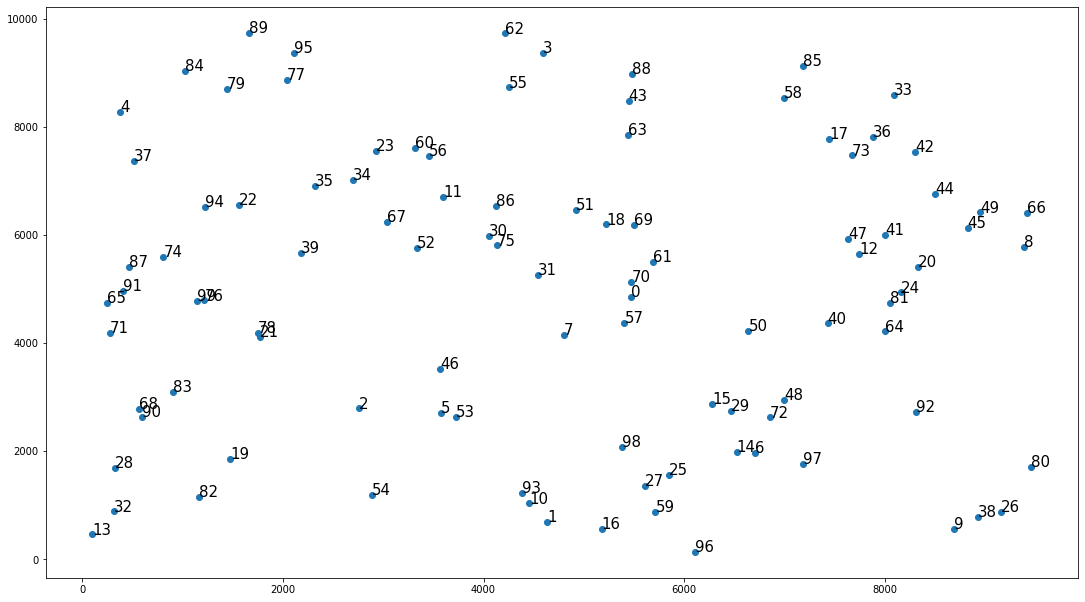

In [101]:
ex_pairs.plot_line_between(24, 66)